### 1. Importing packages

In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# no warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# displaying up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# setting default font size
plt.rcParams['font.size'] = 24

# internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# clustering data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 2. Loading dataset and Feature engineering

In [ ]:
# reading credit into a dataframe 
credit = pd.read_csv('credit_data.csv')

# displaying top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
credit.shape

(100514, 19)

In [ ]:
# data types and missing values

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
# statistics for each column

credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
# features only for identification

credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [ ]:
# calculating missing values by column

def missing_values_table(df):
    # total missing values
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # making a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # renaming the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # sorting the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # printing some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # returning the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Missing Values,% of Total Values


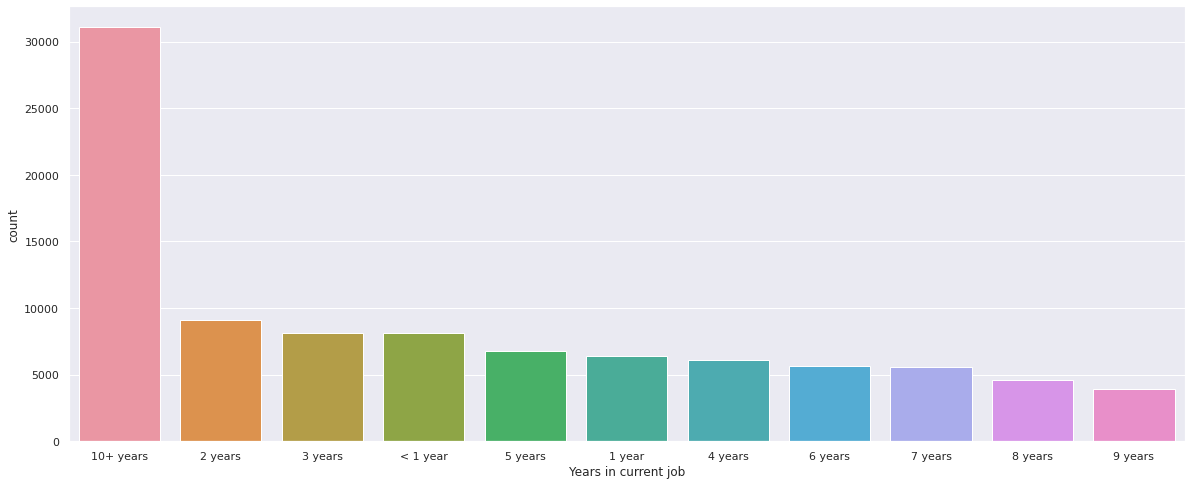

In [ ]:
# dropping the columns with > 50% missing
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)
credit[credit['Years of Credit History'].isnull() == True]

# 514 observations are NaN values

credit.drop(credit.tail(514).index, inplace=True) # dropping last 514 rows

# number of missing values is so low in 'Maximum Open Credit', 'Tax Liens', 'Bankruptcies'

for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

credit.fillna(credit.mean(), inplace=True)

plt.figure(figsize=(20,8))
sns.countplot(credit['Years in current job'], order = credit['Years in current job'].value_counts().index)

credit.fillna('10+ years', inplace=True) # filling with '10+ years'
missing_values_table(credit)

### 3. Feature engineering and selection

In [ ]:
# encoding categorical data & feature scaling

# selecting the categorical columns
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# one hot encoding
categorical_subset = pd.get_dummies(categorical_subset)

# joining the dataframe in credit_train
credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [ ]:
# removing collinear features

def remove_collinear_features(x, threshold):
    # not removing correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # calculating the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # iterating through the correlation matrix and comparing correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # if correlation exceeds the threshold
            if val >= threshold:
                # printing the correlated features and the correlation values
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # dropping one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # adding the score back in to the data
    x['Loan Status'] = y
               
    return x

In [ ]:
# removing the collinear features above a specified correlation coefficient

credit = remove_collinear_features(credit, 0.6);

In [ ]:
credit.shape

(99794, 42)

In [ ]:
features = credit.drop(columns='Loan Status')

sc = StandardScaler()
features_df = sc.fit_transform(features)

In [ ]:
# normalizing the data
normalized_df = normalize(features_df)

# converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

### 4. Clustering

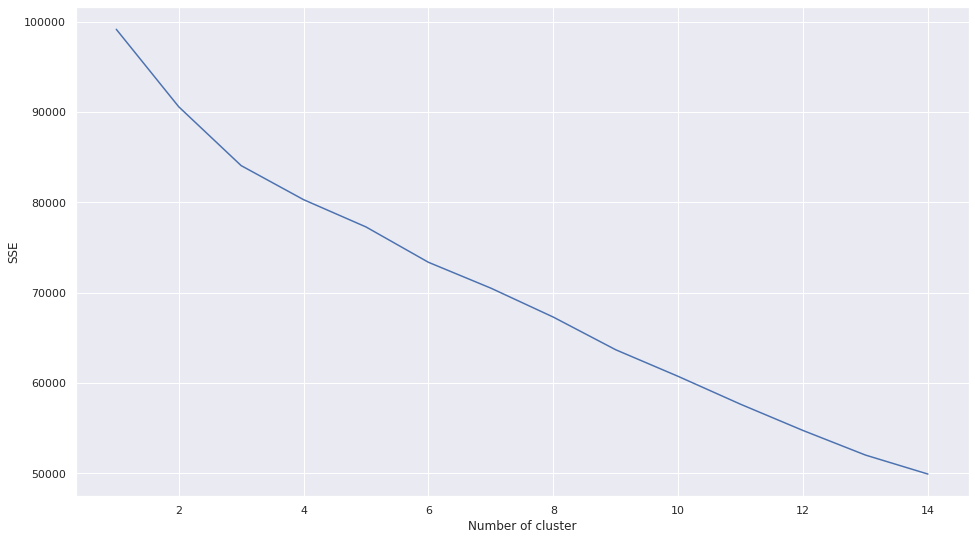

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_df)
    sse[k] = kmeans.inertia_ # inertia: sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmean = KMeans(3)
kmean.fit(features_df)
labels = kmean.labels_

In [ ]:
labels = pd.DataFrame(labels)
labels.columns = ['Cluster']

In [ ]:
labels

,Cluster
0,0
1,2
2,2
3,1
4,2
...,...
99789,2
99790,2
99791,2
99792,2


In [ ]:
credit = pd.DataFrame(credit)
credit = pd.DataFrame(credit)
credit_a = credit.values.tolist()
credit_a = pd.DataFrame(credit_a)
credit_a.columns = credit.columns
clusters=pd.concat([credit_a, labels], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

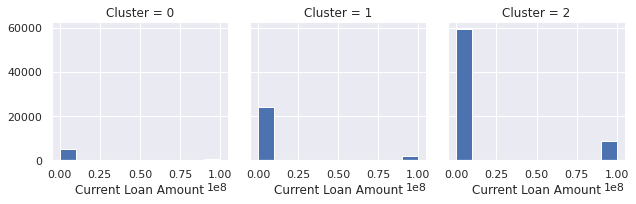

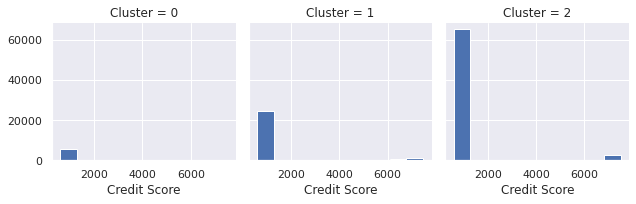

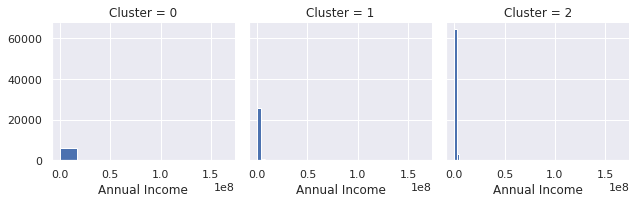

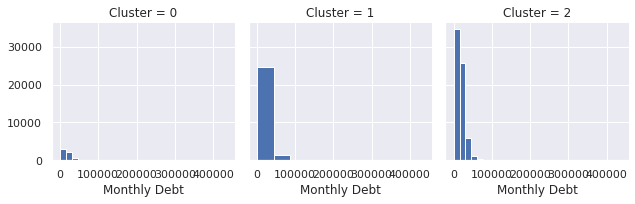

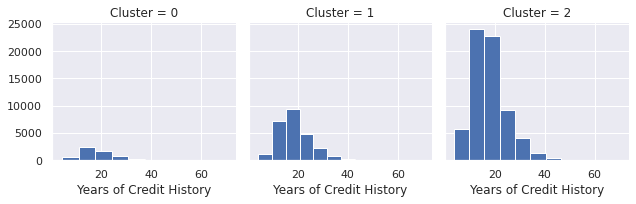

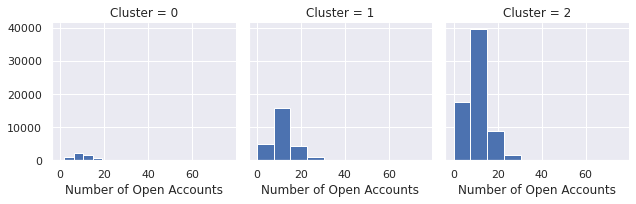

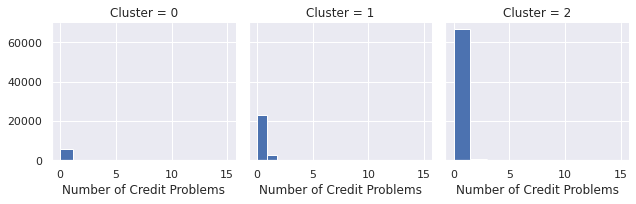

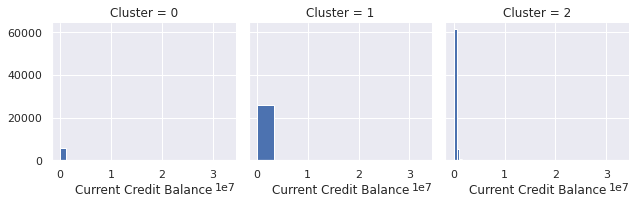

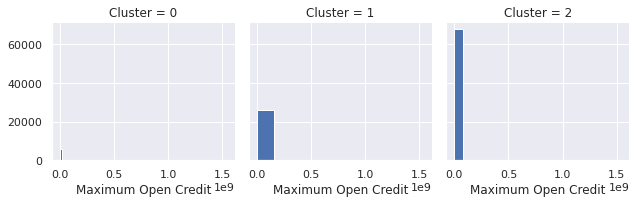

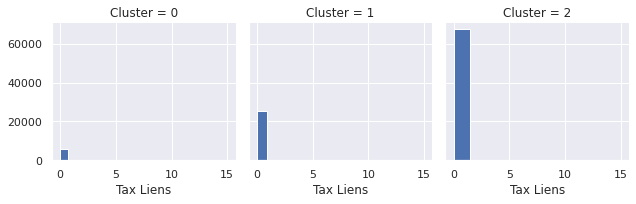

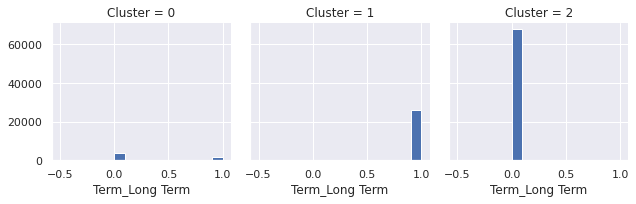

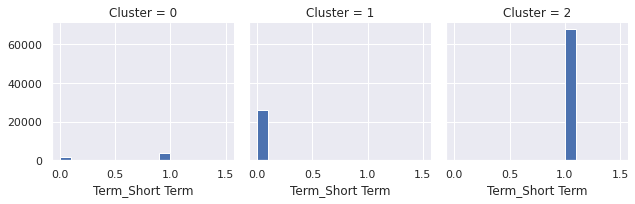

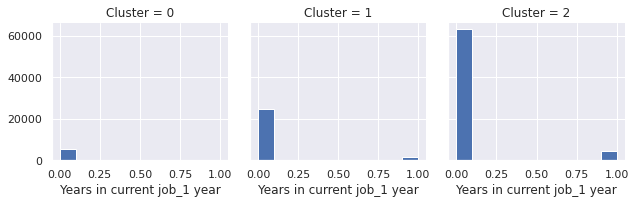

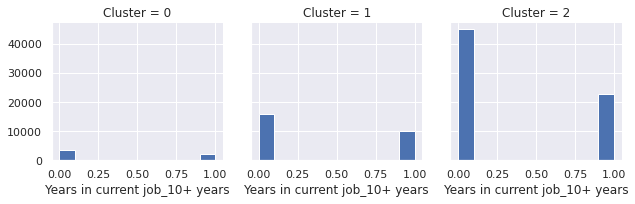

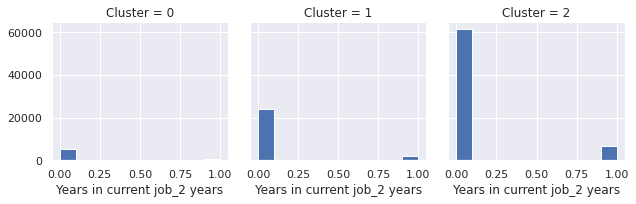

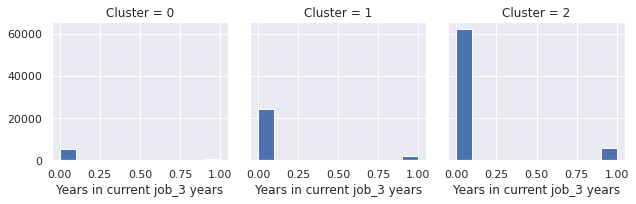

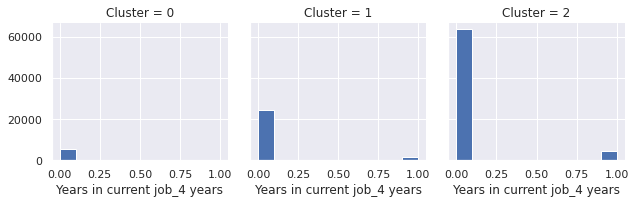

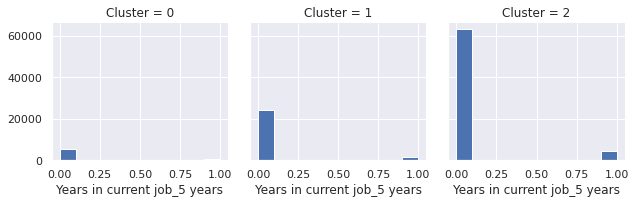

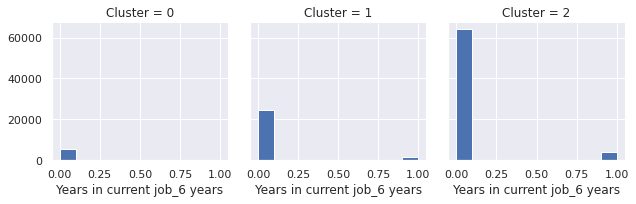

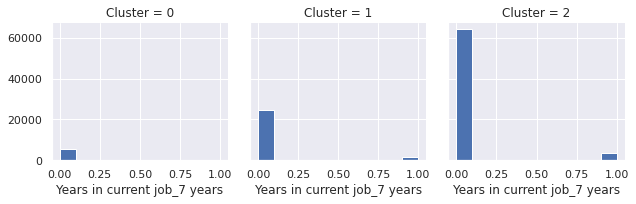

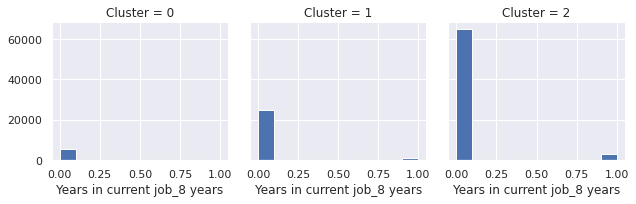

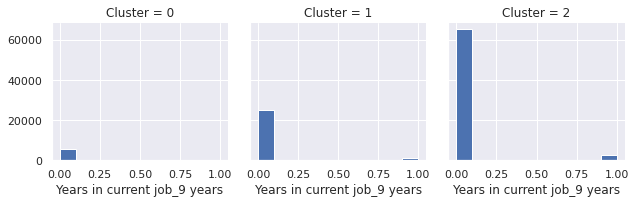

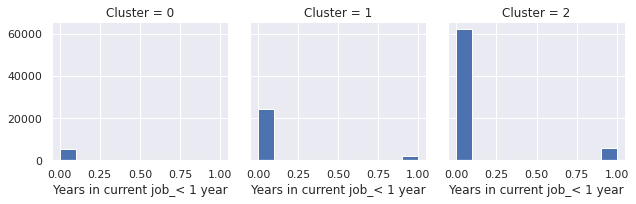

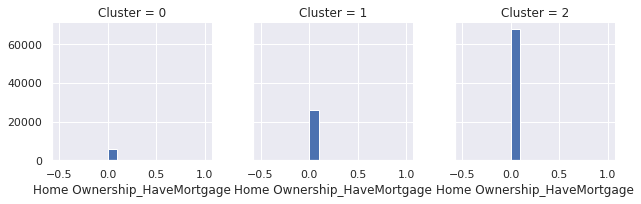

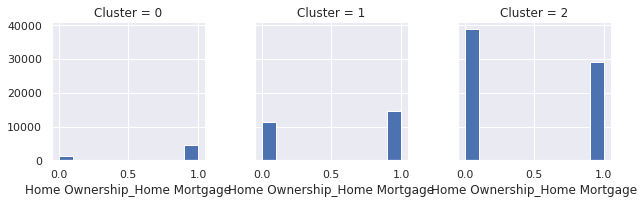

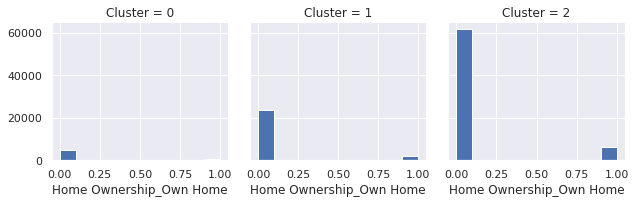

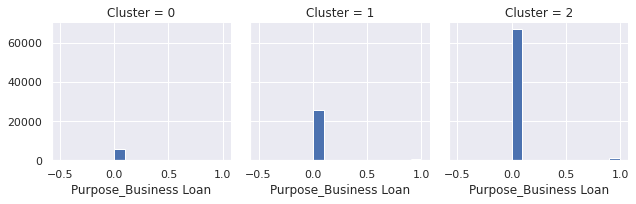

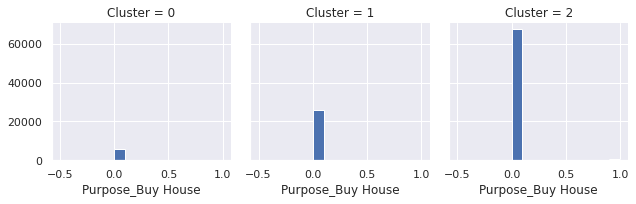

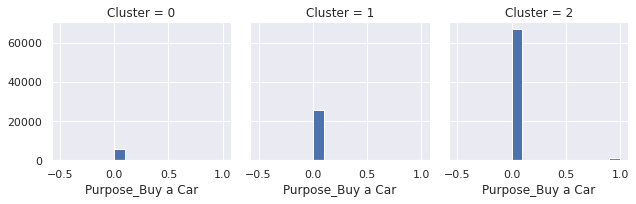

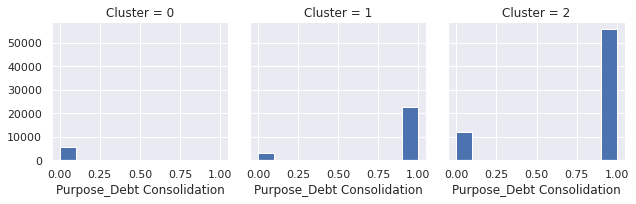

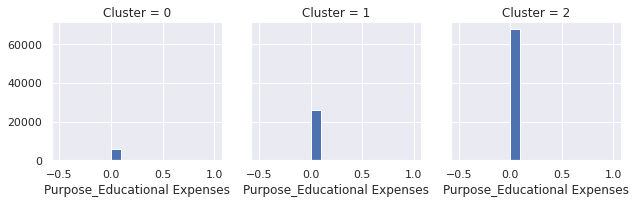

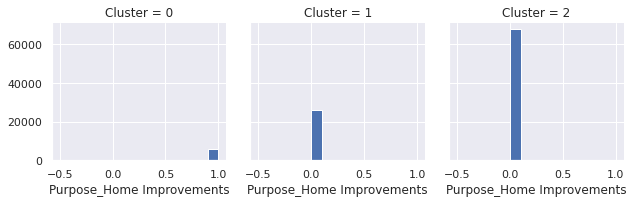

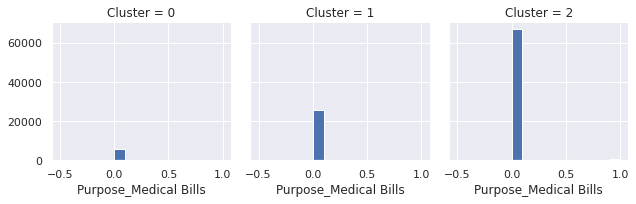

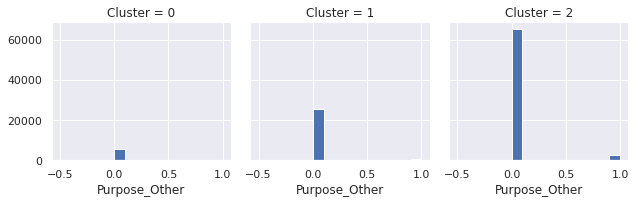

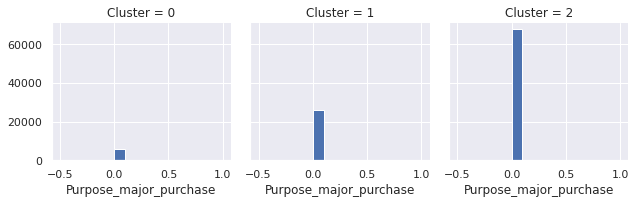

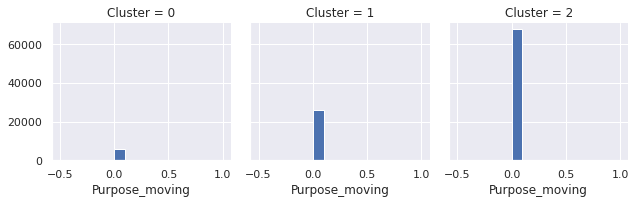

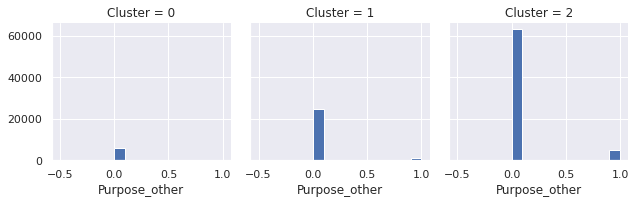

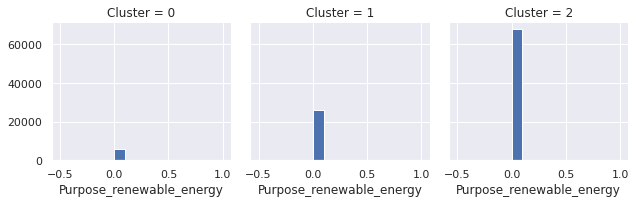

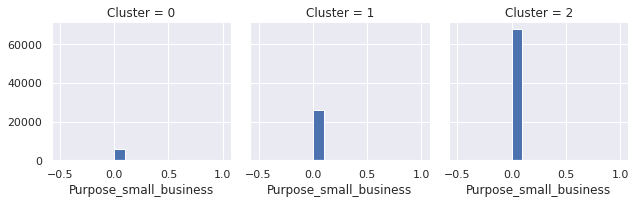

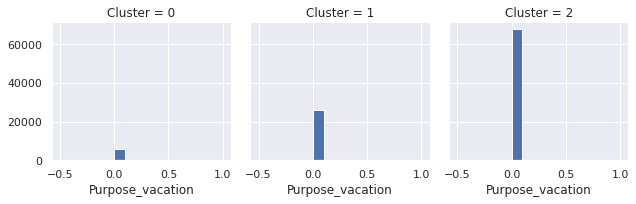

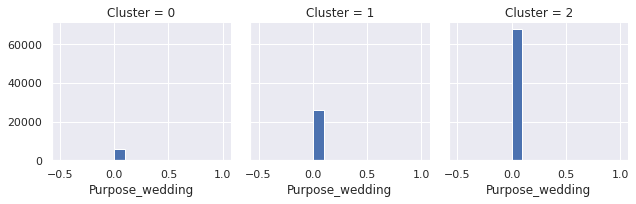

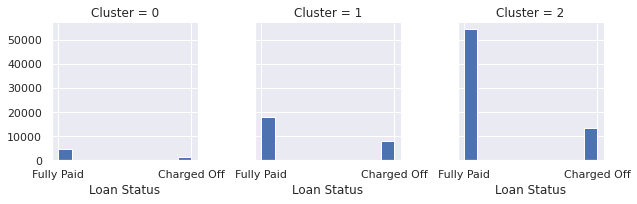

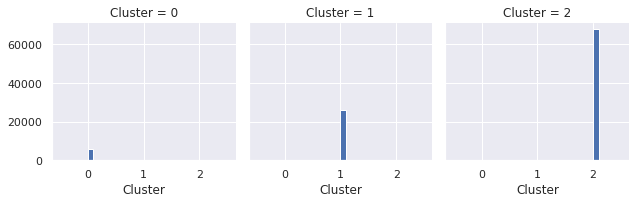

In [ ]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

In [ ]:
clusters['Cluster'].value_counts()

2    67890
1    26075
0     5829
Name: Cluster, dtype: int64

In [ ]:
clusters.groupby('Cluster').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.247386e+07,1027.288778,1.639930e+06,17798.900250,18.945188,10.720364,0.237434,267166.317722,947767.314462,0.034997,0.310516,0.689484,0.052496,0.400583,0.084062,0.074455,0.064848,0.067250,0.059015,0.051295,0.050266,0.040144,0.055584,0.000000,0.786241,0.133985,0.000000,0.000000,0.000000,0.000172,0.000000,0.999828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,8.665332e+06,1150.748332,1.500533e+06,21937.608027,18.691743,11.863854,0.141170,378143.360805,990714.696683,0.027881,0.996433,0.003567,0.056874,0.387766,0.082071,0.073826,0.054880,0.065772,0.056836,0.057910,0.047939,0.043106,0.073020,0.000614,0.561764,0.084717,0.016683,0.007709,0.011198,0.873174,0.000268,0.000000,0.007862,0.023586,0.003413,0.000959,0.048821,0.000115,0.003030,0.000192,0.000690
2,1.288330e+07,1051.877573,1.308947e+06,17219.482291,17.937882,10.884652,0.173192,264956.770143,651630.248903,0.029459,0.000000,1.000000,0.068449,0.336810,0.095360,0.085314,0.063677,0.068802,0.056709,0.055443,0.044572,0.038165,0.086699,0.002902,0.428679,0.090912,0.016497,0.007026,0.014258,0.819870,0.001267,0.000000,0.013537,0.038695,0.003874,0.001841,0.069775,0.000103,0.002916,0.001414,0.001385


### 5. Visualization

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['Principal component 1', 'Principal component 2'])
principalDf.head(2)

,Principal component 1,Principal component 2
0,-0.200643,-0.067012
1,0.389606,0.222683


In [ ]:
finalDf = pd.concat([principalDf, labels], axis = 1)
finalDf.head()

,Principal component 1,Principal component 2,Cluster
0,-0.200643,-0.067012,0
1,0.389606,0.222683,2
2,-0.161412,-0.096658,2
3,-0.108064,-0.460967,1
4,-0.331346,-0.062527,2


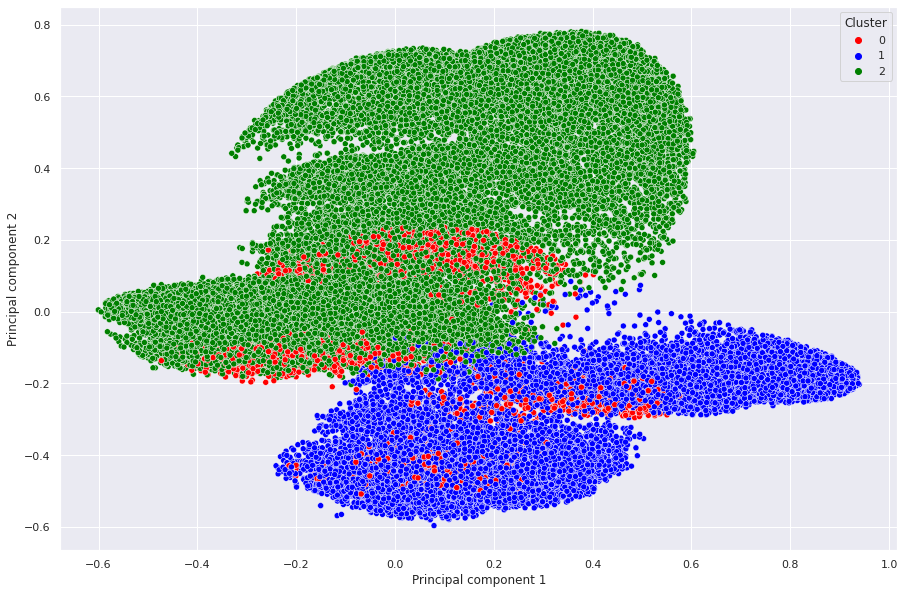

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Principal component 1", y="Principal component 2", hue="Cluster", data=finalDf,palette=['red','blue','green'])
plt.show()

In [ ]:
cluster_proportion = clusters[['Loan Status', 'Cluster']]

In [ ]:
cluster_proportion

,Loan Status,Cluster
0,Fully Paid,0
1,Fully Paid,2
2,Fully Paid,2
3,Fully Paid,1
4,Fully Paid,2
...,...,...
99789,Fully Paid,2
99790,Fully Paid,2
99791,Fully Paid,2
99792,Fully Paid,2


In [ ]:
cluster_0 = cluster_proportion['Cluster'] == 0
cluster_1 = cluster_proportion['Cluster'] == 1
cluster_2 = cluster_proportion['Cluster'] == 2

In [ ]:
cluster_0 = cluster_proportion[cluster_0]
cluster_1 = cluster_proportion[cluster_1]
cluster_2 = cluster_proportion[cluster_2]

In [ ]:
print('The Loan Status Proportion of the Whole Dataset (Unit: %)')
(cluster_proportion.groupby('Loan Status').count()/len(cluster_proportion) * 100).round(4)

The Loan Status Proportion of the Whole Dataset (Unit: %)


,Cluster
Loan Status,
Charged Off,22.6336
Fully Paid,77.3664


In [ ]:
print('The Loan Status Proportion of the Cluster 0 (Unit: %)')
(cluster_0.groupby('Loan Status').count()/len(cluster_0) * 100).round(4)

The Loan Status Proportion of the Cluster 0 (Unit: %)


,Cluster
Loan Status,
Charged Off,19.952
Fully Paid,80.048


In [ ]:
print('The Loan Status Proportion of the Cluster 1 (Unit: %)')
(cluster_1.groupby('Loan Status').count()/len(cluster_1) * 100).round(4)

The Loan Status Proportion of the Cluster 1 (Unit: %)


,Cluster
Loan Status,
Charged Off,30.3471
Fully Paid,69.6529


In [ ]:
print('The Loan Status Proportion of the Cluster 2 (Unit: %)')
(cluster_2.groupby('Loan Status').count()/len(cluster_2) * 100).round(4)

The Loan Status Proportion of the Cluster 2 (Unit: %)


,Cluster
Loan Status,
Charged Off,19.9013
Fully Paid,80.0987
